In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

In [2]:
start_time = timeit.default_timer()
print('Start Time (in sec) - ',start_time)

Start Time (in sec) -  6.220009833835547e-07


In [3]:
authorPublicationsData = pd.read_csv('data/author_publications_1970_2016_asiansAsNone.txt')
#authorPublicationsData = pd.read_csv('data/author_publications_1970_2000_asiansAsNone.csv')
# To speed up the implementation, if required consider a small dataset
# Look at 'shorten-dblp-data-for-faster-access' notebook to creat a smaller dataset
authorPublicationsData.describe()

,year
count,9.078240e+06
mean,2.007702e+03
std,6.987617e+00
min,1.970000e+03
25%,2.005000e+03
50%,2.009000e+03
75%,2.013000e+03
max,2.016000e+03


In [4]:
authorPublicationsData.head()

,author,year,pub_id
0,kim l. blackwell,2014,55503da645ce0a409eb273e8
1,nima mesgarani,2014,55503da645ce0a409eb273e9
2,james j. abbas,2014,55503da645ce0a409eb273ea
3,eberhart zrenner,2014,55503da645ce0a409eb273ec
4,jonathan rubin,2014,55503da645ce0a409eb273e0


### 1.7 million authors and 3 million publications over 47 years (1970 to 2016) are available from the data

In [5]:
#Unique values
print('Authors# - ',authorPublicationsData['author'].nunique())
print('Year# - ',authorPublicationsData['year'].nunique())
print('Publications# - ',authorPublicationsData['pub_id'].nunique())

Authors# -  1708185
Year# -  47
Publications# -  3085544


In [6]:
#get the year list - as it helps to enumerate and find gini co-efficient for each year (irrespective of the dataset)
years = np.sort(authorPublicationsData['year'].unique())
print(years)
#print(type(years))

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016]


### Cohort Size group (whether individual years are good enough or clubs of few years are required)

#### First and foremost - let us look at the performance of researchers
#### We need to remove the dropouts based on following condition
##### researchers whose career span is less than 10 years 
##### and has published less than 10 papers (necessary ? - as of now keeping it)

In [7]:
#Group by author
groupByAuthor = authorPublicationsData.groupby(['author'])
# find the minimum and maximum year of publications and its count for each author
groupByAuthorMinYearData = groupByAuthor['year'].min()
groupByAuthorMaxYearData = groupByAuthor['year'].max()
groupByAuthorCountPublicationsData = groupByAuthor['pub_id'].count()

In [8]:
# merge all the dataframes into one and filter based on conditions
authorScientificYearStart = groupByAuthorMinYearData.reset_index()
authorScientificYearStart.rename(inplace=True, columns={'author':'author','year':'start_year'})
authorScientificYearEnd = groupByAuthorMaxYearData.reset_index()
authorScientificYearEnd.rename(inplace=True, columns={'author':'author','year':'end_year'})
authorPublishCount = groupByAuthorCountPublicationsData.reset_index()
authorPublishCount.rename(inplace=True, columns={'author':'author','pub_id':'pub_count'})

authorScientificYearStartEnd = authorScientificYearStart.merge(authorScientificYearEnd,on='author')
authorScientificYearStartEnd_publish_count = authorScientificYearStartEnd.merge(authorPublishCount,on='author')

#save all the data - might be useful
authorScientificYearStartEnd_publish_count.to_csv('data/authors-scientific-start-end-year-publish-count.csv',
                                                  index=False, encoding='utf-8')

### 111K authors have scientific career span atleast 10 years and have published atleast 10 papers

In [9]:
#filter authors who have less than 10 years of career and have less than 10 publications
credible_authors = authorScientificYearStartEnd_publish_count[(authorScientificYearStartEnd_publish_count['end_year'] - 
                                            authorScientificYearStartEnd_publish_count['start_year']) > 10 ]
credible_authors = credible_authors[credible_authors['pub_count'] >= 10]
credible_authors.describe()

,start_year,end_year,pub_count
count,111267.000000,111267.000000,111267.000000
mean,1995.392911,2014.076438,40.563869
std,7.710813,3.175051,47.882730
min,1970.000000,1981.000000,10.000000
25%,1991.000000,2014.000000,15.000000
50%,1997.000000,2015.000000,25.000000
75%,2001.000000,2016.000000,47.000000
max,2005.000000,2016.000000,1206.000000


In [10]:
credible_authors.to_csv('data/authors-scientific-atleast-10-year-10-papers.csv',
                        index=False, encoding='utf-8')

In [11]:
credibleAuthorPublicationsData = authorPublicationsData[authorPublicationsData['author'].isin(credible_authors['author'])]
credibleAuthorPublicationsData.reset_index(inplace=True)

#Crosschecking whether the filtering worked or not
print('Authors# - ',credibleAuthorPublicationsData['author'].nunique())
print('Year# - ',credibleAuthorPublicationsData['year'].nunique())
print('Publications# - ',credibleAuthorPublicationsData['pub_id'].nunique())

Authors# -  111267
Year# -  47
Publications# -  2417905


### Authors have scientific career span atleast 20 years and have published atleast 20 papers

#### ~26K authors

In [12]:
#filter authors who have less than 20 years of career and have less than 20 publications
credible_authors_20 = authorScientificYearStartEnd_publish_count[(authorScientificYearStartEnd_publish_count['end_year'] - 
                                            authorScientificYearStartEnd_publish_count['start_year']) > 20 ]
credible_authors_20 = credible_authors_20[credible_authors_20['pub_count'] >= 20]

credible_authors_20.to_csv('data/authors-scientific-atleast-20-year-20-papers.csv',
                        index=False, encoding='utf-8')
credible_authors_20.describe()

,start_year,end_year,pub_count
count,26736.000000,26736.000000,26736.000000
mean,1987.303523,2014.530184,72.699207
std,6.311211,2.496166,70.877197
min,1970.000000,1991.000000,20.000000
25%,1984.000000,2015.000000,31.000000
50%,1989.000000,2015.000000,50.000000
75%,1992.000000,2016.000000,87.000000
max,1995.000000,2016.000000,1206.000000


### For scientists-10-years-10-papers
#### We examine when authors start their publications and how does their distribution looks like
#### At the same time, when does their scientific career ends and how does the distribution looks like

In [13]:
#Group by author
groupByAuthor = credibleAuthorPublicationsData.groupby(['author'])
# find the minimum and maximum year of publications and its count for each author
groupByAuthorMinYearData = groupByAuthor['year'].min()
groupByAuthorMaxYearData = groupByAuthor['year'].max()
groupByAuthorCountPublicationsData = groupByAuthor['pub_id'].count()

### More no. of new scientfic researchers are involved as the year progresses
#### At year 2005 - fewer new scientists have published ( as of now ignoring it - could be a problem in code)
#### No. of cohort groups is 36
#### Minimum cohort size is 433 and maximum is 8465
#### 75% of 36 groups are over 736 in group size

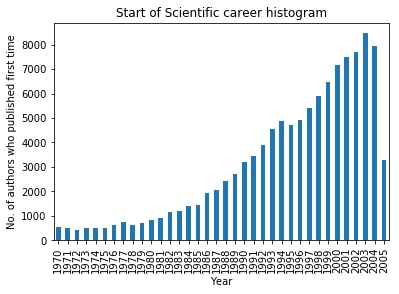

count      36.000000
mean     3090.750000
std      2594.870527
min       433.000000
25%       736.000000
50%      2246.500000
75%      4901.250000
max      8465.000000
Name: year, dtype: float64

In [14]:
scientificYearStartHistogram = groupByAuthorMinYearData.value_counts(sort=False)
ax = scientificYearStartHistogram.sort_index().plot(kind='bar', title='Start of Scientific career histogram')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published first time")

plt.show()

scientificYearStartHistogram.describe()

In [15]:
#Manually checked to ensure they are right
scientificYearStartHistogram.sort_index()

1970     534
1971     520
1972     433
1973     519
1974     498
1975     488
1976     613
1977     740
1978     636
1979     724
1980     838
1981     910
1982    1160
1983    1214
1984    1416
1985    1428
1986    1923
1987    2069
1988    2424
1989    2723
1990    3206
1991    3458
1992    3911
1993    4554
1994    4897
1995    4697
1996    4914
1997    5389
1998    5889
1999    6488
2000    7164
2001    7491
2002    7706
2003    8465
2004    7934
2005    3294
Name: year, dtype: int64

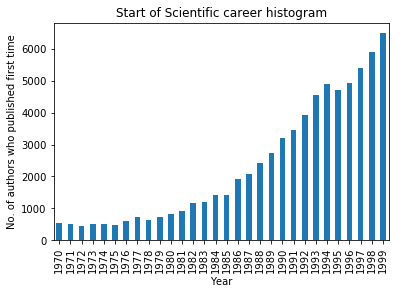

count      30.000000
mean     2307.100000
std      1926.306943
min       433.000000
25%       658.000000
50%      1422.000000
75%      3797.750000
max      6488.000000
Name: year, dtype: float64

In [16]:
scientificYearStartHistogram = groupByAuthorMinYearData.value_counts(sort=False)
ax = scientificYearStartHistogram[scientificYearStartHistogram.index < 2000].sort_index().plot(kind='bar', title='Start of Scientific career histogram')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published first time")

plt.show()

scientificYearStartHistogram[scientificYearStartHistogram.index < 2000].describe()

### Culmination of research increases as  year progresses - Correlates with the increase of Start of Scientific career
#### At year 2016, there is a dip - need to analyse it - we shall ignore for this moment

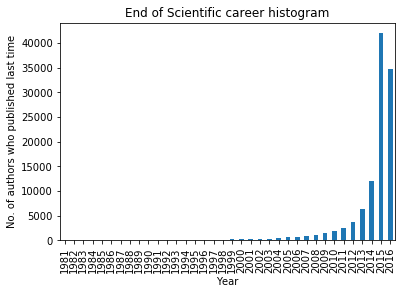

count       36.00000
mean      3090.75000
std       9011.29193
min          2.00000
25%         31.25000
50%        192.00000
75%       1007.75000
max      41995.00000
Name: year, dtype: float64

In [17]:
scientificYearEndHistogram = groupByAuthorMaxYearData.value_counts(sort=False)
ax = scientificYearEndHistogram.sort_index().plot(kind='bar', 
                                                  title='End of Scientific career histogram')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published last time")
#ax.set_ylim([0,3000])
plt.show()

scientificYearEndHistogram.describe()

In [18]:
scientificYearEndHistogram.sort_index()

1981        3
1982        2
1983        5
1984        7
1985       12
1986       13
1987       15
1988       19
1989       26
1990       33
1991       36
1992       56
1993       65
1994       87
1995       81
1996      123
1997      142
1998      162
1999      222
2000      241
2001      254
2002      348
2003      359
2004      496
2005      624
2006      747
2007      952
2008     1175
2009     1566
2010     1887
2011     2571
2012     3770
2013     6385
2014    12074
2015    41995
2016    34714
Name: year, dtype: int64

#### Some other analysis that could be done  are
1) We find the best/better cohort group(s) that can be compared. As of now, if we consider atleast 15 years of research can be used for comparison then we have 32 cohort groups (1970 to 2001)
Best cohort group - similar characteristics (there might be many reasons for one to end his/her scientific career)
Consider people who start and at the same time end their career as well ???
Also Consider their growth (their peak time and the trend) ???

2) Increase the cohort group size - Can group the authors by years

3) Drop out rates are high - this is why we insist 10/20 year 10/20 paper constraint

### For scientists-20-years-20-papers
#### We examine when authors start their publications and how does their distribution looks like
#### At the same time, when does their scientific career ends and how does the distribution looks like

In [19]:
credibleAuthorPublicationsData = authorPublicationsData[authorPublicationsData['author'].isin(credible_authors_20['author'])]
credibleAuthorPublicationsData.reset_index(inplace=True)

#Crosschecking whether the filtering worked or not
print('Authors# - ',credibleAuthorPublicationsData['author'].nunique())
print('Year# - ',credibleAuthorPublicationsData['year'].nunique())
print('Publications# - ',credibleAuthorPublicationsData['pub_id'].nunique())

Authors# -  26736
Year# -  47
Publications# -  1440278


In [20]:
#Group by author
groupByAuthor = credibleAuthorPublicationsData.groupby(['author'])
# find the minimum and maximum year of publications and its count for each author
groupByAuthorMinYearData = groupByAuthor['year'].min()
groupByAuthorMaxYearData = groupByAuthor['year'].max()
groupByAuthorCountPublicationsData = groupByAuthor['pub_id'].count()

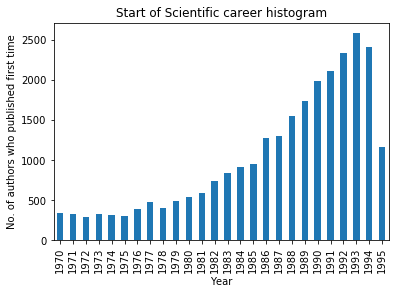

count      26.000000
mean     1028.307692
std       750.264474
min       289.000000
25%       396.250000
50%       790.500000
75%      1485.750000
max      2585.000000
Name: year, dtype: float64

In [21]:
scientificYearStartHistogram = groupByAuthorMinYearData.value_counts(sort=False)
ax = scientificYearStartHistogram.sort_index().plot(kind='bar', title='Start of Scientific career histogram')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published first time")
plt.show()

scientificYearStartHistogram.describe()

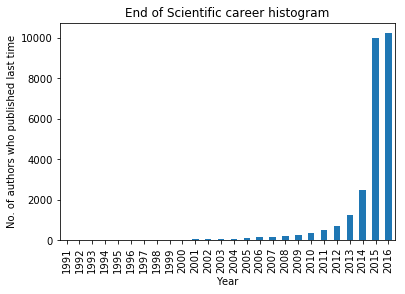

count       26.000000
mean      1028.307692
std       2726.943912
min          1.000000
25%         20.250000
50%         59.500000
75%        326.250000
max      10237.000000
Name: year, dtype: float64

In [22]:
scientificYearEndHistogram = groupByAuthorMaxYearData.value_counts(sort=False)
ax = scientificYearEndHistogram.sort_index().plot(kind='bar', title='End of Scientific career histogram')
ax.set_xlabel("Year")
ax.set_ylabel("No. of authors who published last time")
plt.show()

scientificYearEndHistogram.describe()

In [23]:
end_time = timeit.default_timer()
print('End Time (in sec) - ',end_time)
print('Time taken (in sec) - ',end_time-start_time)

End Time (in sec) -  99.27236738861284
Time taken (in sec) -  99.27236676661185
